# Imports and Data

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import utils
import configparser

In [17]:
#inline render of shap
shap.initjs()

#getting data
raw_df = pd.read_csv('/Users/emi/Documents/GitHub/ROB-EDA/data/semi_raw_data/df_30percent_variance_exclusion.csv')
keeplist = keeplist = ['Driving.Frequency', 'Age', 'Education', 'SES', 'Driving.Risk.General', 'CVSCALE.PD_Total', 'BFI.extraversion', 
            'Control_Total', 'Anxiety.As.Passenger', 'Risk.Willingness.General', 'Gender', 'BFI.conscientiousness', 
            'BFI.agreeableness', 'Info.processing_Total', 'CVSCALE.UA_Total', 'Politics', 'BFI.openness', 
            'CVSCALE.C_Total', 'Self.Esteem_Total', 'Overall.Risk.Benefit', 'NFC.Ambiguity_Total', 'BFI.neuroticism', 
            'NFC.Predictability_Total', 'NumOfCollisions', 'Risk.Benefit.Model_1', 'Risk.Benefit.Model_2', 
            'Risk.Benefit.Model_3', 'Risk.Benefit.Model_4', 'Risk.Benefit.Model_5', 'Risk.Benefit.Model_6', 
            'Risk.Benefit.Model_8', 'Risk.Benefit.Model_9', 'Risk.Benefit.Model_10', 'Risk.Benefit.Model_11', 
            'Risk.Benefit.Model_12', 'Risk.Benefit.Model_14', 'Risk.Benefit.Model_15',  'Risk.Benefit.Model_17', 
            'Composite.AV.Trust_16', 'Composite.AV.Trust_1', 'Composite.AV.Trust_3', 'Composite.AV.Trust_6', 
            'Composite.AV.Trust_22', 'AV.Priors_1', 'AV.Priors_2', 'AV.Priors_3', 'AV.Priors_4', 'AV.Priors_5', 
            'AV.Priors_6', 'AV.Priors_7', 'AV.Priors_8', 'AV.Priors_9', 'AV.Priors_10', 'AV.feasibility', 'Prior.AV.Exp', 
            'AV.Functions_1', 'AV.Functions_2', 'AV.Functions_3', 'AV.Functions_4', 'AV.Functions_5', 'AV.Functions_6', 
            'AV.Functions_7', 'AV.Functions_8', 'Trust.Institutions_1', 'Trust.Institutions_2', 'Trust.Institutions_3', 
            'Tech.Affinity_1', 'Tech.Affinity_2', 'Tech.Affinity_3', 'Tech.Affinity_4', 'Tech.self.efficacy_1', 
            'Tech.self.efficacy_2', 'Tech.self.efficacy_3', 'Tech.self.efficacy_4', 'Tech.self.efficacy_5', 
            'MDSI.Driving.Style_1', 'MDSI.Driving.Style_2', 'MDSI.Driving.Style_3', 'MDSI.Driving.Style_4', 
            'MDSI.Driving.Style_5', 'MDSI.Driving.Style_6', 'MDSI.Driving.Style_7', 'MDSI.Driving.Style_8', 
            'MDSI.Driving.Style_9', 'MDSI.Driving.Style_10', 'MDSI.Driving.Style_11', 'MDSI.Driving.Style_12', 
            'MDSI.Driving.Style_13', 'MDSI.Driving.Style_14', 'MDSI.Driving.Style_15', 'MDSI.Driving.Style_16', 
            'MDSI.Driving.Style_17', 'MDSI.Driving.Style_18', 'MDSI.Driving.Style_19', 'MDSI.Driving.Style_20', 
            'MDSI.Driving.Style_21', 'MDSI.Driving.Style_22', 'MDSI.Driving.Style_23', 'MDSI.Driving.Style_24', 
            'MDSI.Driving.Style_25', 'MDSI.Driving.Style_26', 'MDSI.Driving.Style_27', 'MDSI.Driving.Style_28', 
            'MDSI.Driving.Style_29', 'MDSI.Driving.Style_30', 'MDSI.Driving.Style_31', 'MDSI.Driving.Style_32', 
            'MDSI.Driving.Style_33', 'MDSI.Driving.Style_34', 'MDSI.Driving.Style_36', 'MDSI.Driving.Style_37', 
            'MDSI.Driving.Style_38', 'MDSI.Driving.Style_39', 'MDSI.Driving.Style_40', 'MDSI.Driving.Style_41', 
            'MDSI.Driving.Style_42', 'MDSI.Driving.Style_43', 'Driving.Cognitions_1', 'Driving.Cognitions_2', 
            'Driving.Cognitions_3', 'Driving.Cognitions_4', 'Driving.Cognitions_5', 'Driving.Cognitions_6', 
            'Driving.Cognitions_7', 'Driving.Cognitions_8', 'Driving.Cognitions_9', 'Driving.Cognitions_10', 
            'Driving.Cognitions_11', 'Driving.Cognitions_12', 'Driving.Cognitions_13', 'Composite.Trust.Narrow.Combined']

config = configparser.ConfigParser()
config.read('config.ini')
df = raw_df[keeplist]
df.dropna(axis=0, inplace=True)
target_column ='Composite.Trust.Narrow.Combined'

def encode(x):
    threshold = 18
    if x >= threshold:
        return 1
    else:
        return 0
    
df.loc[:, f'{target_column}.encoded'] = df[target_column].apply(encode)


/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_83800/524073042.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)
/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_83800/524073042.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'{target_column}.encoded'] = df[target_column].apply(encode)


## Preprocessing

In [21]:
# Split data
X = df.drop(columns=[target_column, f'{target_column}.encoded'])
y = df[f'{target_column}.encoded']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with LDA and Naive Bayes
pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),  # LDA for dimensionality reduction
    ('nb', GaussianNB())  # Naive Bayes for classification
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print(f'LDA + Naive Bayes: Acc: {accuracy}, Prec: {precision}, Rec: {recall}, BALANCED ACC: {balanced_acc}, F1: {f1} , AUC ROC: {auc_roc}')




LDA + Naive Bayes: Acc: 0.8705882352941177, Prec: 0.870050573578389, Rec: 0.8703703703703705, BALANCED ACC: 0.8703703703703705, F1: 0.8701969797467183 , AUC ROC: 0.9498765432098766


In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with scaling, LDA, and Naive Bayes
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lda', LinearDiscriminantAnalysis()),  # LDA for dimensionality reduction
    ('nb', GaussianNB())  # Naive Bayes for classification
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Calculate predict_proba
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_proba)

print(f'LDA + Naive Bayes: Acc: {accuracy}, Prec: {precision}, Rec: {recall}, BALANCED ACC: {balanced_acc}, F1: {f1}, AUC ROC: {auc_roc}')


LDA + Naive Bayes: Acc: 0.8705882352941177, Prec: 0.870050573578389, Rec: 0.8703703703703705, BALANCED ACC: 0.8703703703703705, F1: 0.8701969797467183, AUC ROC: 0.9498765432098766


## SHAP

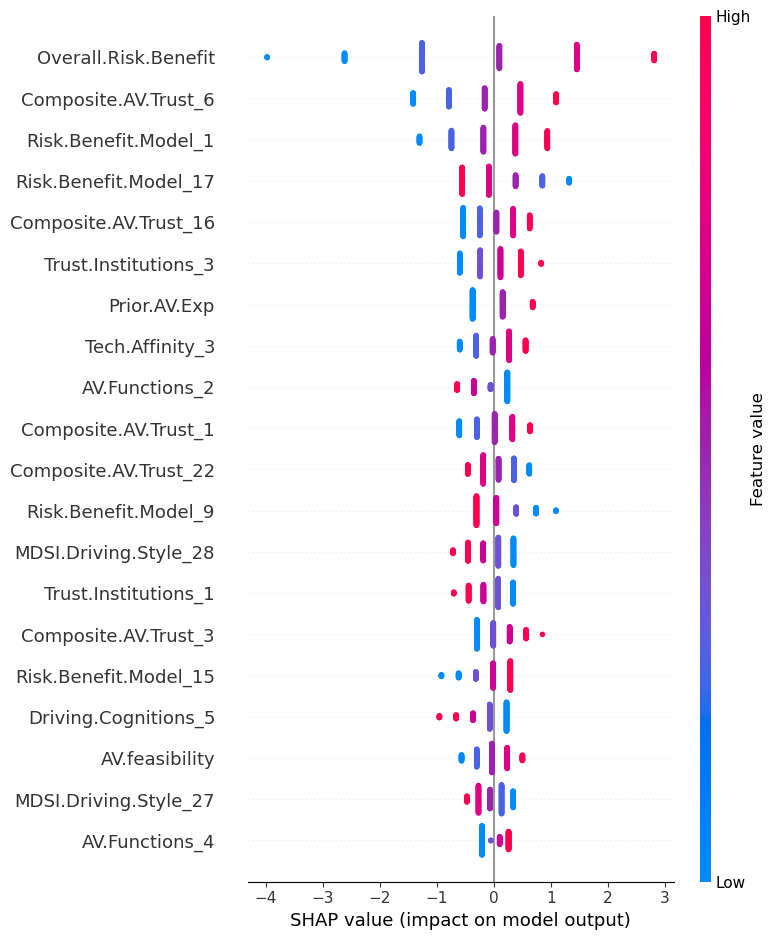

ValueError: Could not find feature named: Composite.Trust.Narrow.Combined.encoded

In [29]:
# SHAP analysis
# For SHAP analysis, we focus on the LDA step
# This assumes that the transformed features by LDA are the focus for SHAP
explainer = shap.Explainer(pipeline.named_steps['lda'], X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

# Plot SHAP dependence for a specific feature
feature = target_column  # Replace with a specific feature name
shap.dependence_plot(feature, shap_values, X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names=['Class 0', 'Class 1']):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

In [37]:
# SHAP analysis
# Use KernelExplainer to explain predictions
# Use a subset of the data to speed up computation
sample_X_train = shap.sample(X_train, 100)  # Adjust the sample size as needed for performance
explainer = shap.KernelExplainer(pipeline.predict_proba, sample_X_train, link="logit")
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for the positive class
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names=None):
    if class_names is None:
        class_names = [f'Class {i}' for i in np.unique(y)]
        
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)



AttributeError: property 'feature_names_in_' of 'Pipeline' object has no setter